## Exploring HCRs identification by contacts

In [2]:
import os
import sys
import cooler 
import matplotlib.pyplot as plt 
import seaborn as sns 

import pandas as pd 
import numpy as np



In [4]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/strawberry/F_c/n5m")

In [5]:
cool = cooler.Cooler("./F_c.pairs.10000.cool")
bins = cool.bins()
chrom_bin_idx_df = bins[:].reset_index()[['index', 'chrom']].set_index('chrom')
chrom_bin_idx = bins[:].reset_index()[['index', 'chrom']].groupby('chrom').agg(list).to_dict()['index']
chrom_bin_idx_df


,index
chrom,
hap1_1A.ctg1,0
hap1_1A.ctg1,1
hap1_1A.ctg1,2
hap1_1A.ctg1,3
hap1_1A.ctg1,4
...,...
hap2_7D.ctg7,159747
hap2_7D.ctg7,159748
hap2_7D.ctg7,159749


In [6]:
test_idxes = chrom_bin_idx_df.loc[['hap1_3A.ctg5', 'hap1_2A.ctg3', 
                                   'hap1_7D.ctg1', 'hap2_1C.ctg8',
                                   'hap2_1D.ctg4', 'hap2_1D.ctg3']]['index'].to_list()
test_matrix = cool.matrix(balance=False, sparse=True)[:].tocsr() # [test_idxes, :][:, test_idxes]

In [15]:
test_matrix.shape

(159752, 159752)

<ipython-input-71-e9e7217a9d0f>:1: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(test_matrix.toarray()), cmap='YlOrRd')


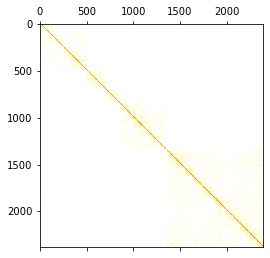

In [71]:
plt.matshow(np.log10(test_matrix.toarray()), cmap='YlOrRd')

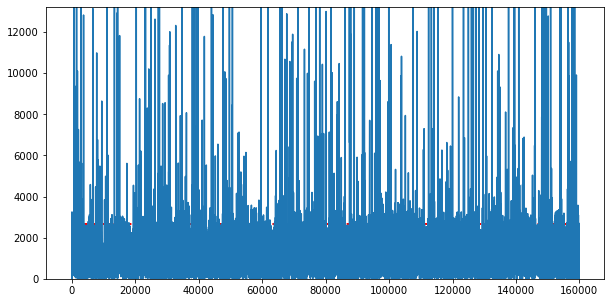

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test_matrix.sum(axis=1))

plt.ylim((0, np.median(np.array(test_matrix.sum(axis=1))) *10))
ax.hlines(np.median(np.array(test_matrix.sum(axis=1))) *2, -100, test_matrix.shape[1], colors='r', linestyles='--', linewidth=2)


In [76]:
np.median(np.array(test_matrix.sum(axis=1)))

1322.0

In [88]:
np.where(np.array(test_matrix.sum(axis=1)) > 1322 * 2)[0].shape

(3139,)

: 

In [79]:
np.array(test_matrix.sum(axis=1)).shape

(159752, 1)

<AxesSubplot:ylabel='Density'>

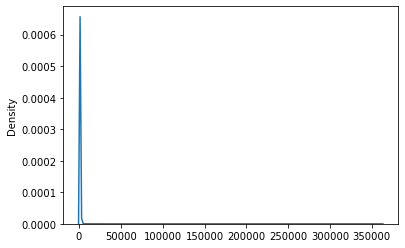

In [86]:
sns.kdeplot(np.array(test_matrix.sum(axis=1)).T[0])

In [85]:
np.array(test_matrix.sum(axis=1)).T[0]

array([1023,  921,  765, ...,  442,  959,  319])